# LightGBM classifier

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Import of data based on feature selection resutls


In [32]:
X = pd.read_table('../data/data/x_train.txt', header=None, delimiter=' ')
y = pd.read_table('../data/data/y_train.txt', header=None)
X_test_submission = pd.read_table('../data/data/x_test.txt', header=None, delimiter=' ')

# based on feature selection investigation
selected_features = [100, 101, 102, 103, 104, 105]
X = X[selected_features]
X_test_submission = X_test_submission[selected_features]

In [33]:
from lightgbm import LGBMClassifier

def apply_optimized_lightgbm(
        X: pd.DataFrame,
        y: pd.Series,
        X_test: pd.DataFrame,
        random_state: int = 0
) -> pd.Series:
    """
    Apply the optimized LightGBM model to the dataset.
    :param X: pd.DataFrame - The training dataset.
    :param y: pd.Series - The target variable.
    :param X_test: pd.DataFrame - The test dataset.
    :param random_state: int - The random state.
    :return: pd.Series - The predictions.
    """

    model = LGBMClassifier(
        n_estimators=50,
        boosting_type='dart',
        objective='binary',
        learning_rate=0.1,
        num_leaves=31,
        random_state=random_state,
        n_jobs=1,
        force_col_wise=True,
        verbose=-1
    )

    model.fit(X, y)
    return pd.Series(model.predict_proba(X_test)[:, 1], index=X_test.index)


In [34]:
from aml_projects.Project2.models.utils import run_experiment

normal_results = run_experiment(
    'lightgbm_results/',
    'normal',
    apply_optimized_lightgbm,
    X,
    y, 
    selected_features,
    iterations=100
)

normal_results

[ExperimentResult(score=5548.856548856549, accuracy=0.668),
 ExperimentResult(score=5772.908366533865, accuracy=0.678),
 ExperimentResult(score=5852.589641434263, accuracy=0.683),
 ExperimentResult(score=6055.21472392638, accuracy=0.712),
 ExperimentResult(score=5961.7706237424545, accuracy=0.699),
 ExperimentResult(score=5626.746506986027, accuracy=0.662),
 ExperimentResult(score=5693.386773547094, accuracy=0.671),
 ExperimentResult(score=5897.233201581027, accuracy=0.677),
 ExperimentResult(score=5833.667334669338, accuracy=0.684),
 ExperimentResult(score=5900.0, accuracy=0.685),
 ExperimentResult(score=5640.0, accuracy=0.661),
 ExperimentResult(score=5998.011928429423, accuracy=0.695),
 ExperimentResult(score=5763.485477178424, accuracy=0.69),
 ExperimentResult(score=5888.88888888889, accuracy=0.694),
 ExperimentResult(score=5848.249027237354, accuracy=0.674),
 ExperimentResult(score=5891.891891891892, accuracy=0.672),
 ExperimentResult(score=5797.642436149313, accuracy=0.67),
 Expe

In [35]:
from aml_projects.Project2.models.utils import run_experiment, generate_feature_interactions_quadratic

squared_results = run_experiment(
    'lightgbm_results/',
    'squared',
    apply_optimized_lightgbm,
    X,
    y, 
    selected_features,
    generate_feature_interactions=generate_feature_interactions_quadratic,
    iterations=100
)

squared_results

[ExperimentResult(score=5694.386694386695, accuracy=0.679),
 ExperimentResult(score=5852.589641434263, accuracy=0.683),
 ExperimentResult(score=5772.908366533865, accuracy=0.678),
 ExperimentResult(score=5871.16564417178, accuracy=0.696),
 ExperimentResult(score=5941.649899396378, accuracy=0.697),
 ExperimentResult(score=5487.025948103792, accuracy=0.657),
 ExperimentResult(score=5673.346693386773, accuracy=0.666),
 ExperimentResult(score=5679.841897233201, accuracy=0.661),
 ExperimentResult(score=5873.74749498998, accuracy=0.687),
 ExperimentResult(score=5980.0, accuracy=0.692),
 ExperimentResult(score=5640.0, accuracy=0.666),
 ExperimentResult(score=5998.011928429423, accuracy=0.7),
 ExperimentResult(score=5867.219917012449, accuracy=0.699),
 ExperimentResult(score=5929.292929292929, accuracy=0.688),
 ExperimentResult(score=5809.3385214007785, accuracy=0.668),
 ExperimentResult(score=5872.586872586872, accuracy=0.683),
 ExperimentResult(score=5856.581532416503, accuracy=0.679),
 Expe

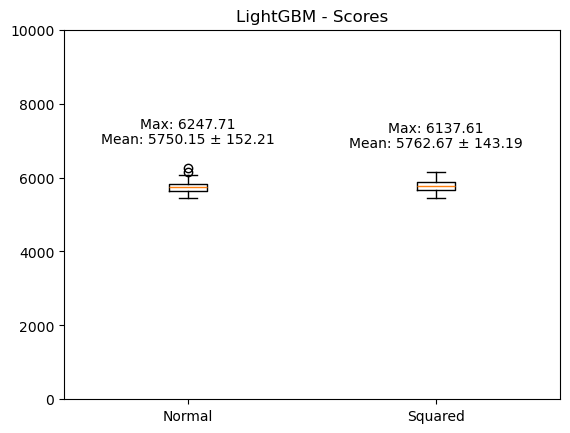

Text(2, 0.8069999999999999, 'Max: 0.71')

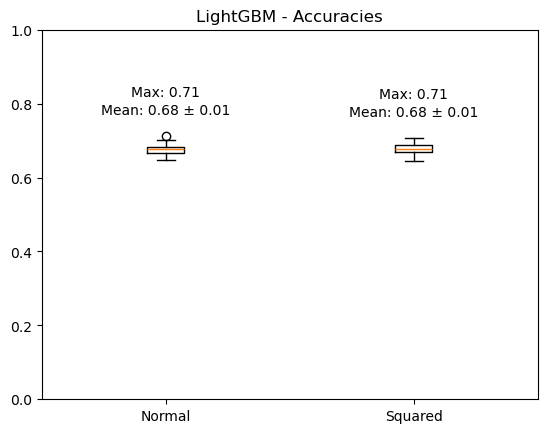

In [36]:
# Boxplot of the results

scores_normal, scores_squared = list(map(lambda x: x.score, normal_results)), list(map(lambda x: x.score, squared_results))
accuracies_normal, accuracies_squared = list(map(lambda x: x.accuracy, normal_results)), list(map(lambda x: x.accuracy, squared_results))

plt.boxplot([scores_normal, scores_squared])
plt.xticks([1, 2], ['Normal', 'Squared'])
plt.ylim(0, 10000)
plt.title('LightGBM - Scores')

# Mean and max scores on plot
plt.text(1, np.max(scores_normal) + 600, f'Mean: {np.mean(scores_normal):.2f} ± {np.std(scores_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(scores_squared) + 600, f'Mean: {np.mean(scores_squared):.2f} ± {np.std(scores_squared):.2f}', ha='center', va='bottom')
plt.text(1, np.max(scores_normal) + 1000, f'Max: {np.max(scores_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(scores_squared) + 1000, f'Max: {np.max(scores_squared):.2f}', ha='center', va='bottom')
plt.show()


plt.boxplot([accuracies_normal, accuracies_squared])
plt.xticks([1, 2], ['Normal', 'Squared'])
plt.ylim(0, 1)
plt.title('LightGBM - Accuracies')

# Mean and max scores on plot
plt.text(1, np.max(accuracies_normal) + 0.05, f'Mean: {np.mean(accuracies_normal):.2f} ± {np.std(accuracies_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(accuracies_squared) + 0.05, f'Mean: {np.mean(accuracies_squared):.2f} ± {np.std(accuracies_squared):.2f}', ha='center', va='bottom')
plt.text(1, np.max(accuracies_normal) + 0.1, f'Max: {np.max(accuracies_normal):.2f}', ha='center', va='bottom')
plt.text(2, np.max(accuracies_squared) + 0.1, f'Max: {np.max(accuracies_squared):.2f}', ha='center', va='bottom')